In [203]:
#populating array of dataframes


from nba_api.stats.endpoints import shotchartleaguewide
import time
import matplotlib.pyplot as plt

i = 1996

shotseasons = []
while i < 2020:
    season = str(i) + "-" + str(i+1)[2:]
    shot = shotchartleaguewide.ShotChartLeagueWide(league_id, season)#goes back to 1996
    shotseasons.append(shot)
    time.sleep(1)
    i+=1
    

shotseasons#contains all the seasons



In [204]:
shotseasons[2].get_data_frames()[0]#up to index 23. 24 in total

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,81,2,0.025
1,League Averages,Above the Break 3,Center(C),24+ ft.,3354,1046,0.312
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,6170,2035,0.330
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,6485,2222,0.343
4,League Averages,Backcourt,Back Court(BC),Back Court Shot,162,4,0.025
5,League Averages,In The Paint (Non-RA),Center(C),Less Than 8 ft.,13222,4721,0.357
6,League Averages,In The Paint (Non-RA),Center(C),8-16 ft.,3140,1248,0.397
7,League Averages,In The Paint (Non-RA),Left Side(L),8-16 ft.,1218,427,0.351
8,League Averages,In The Paint (Non-RA),Right Side(R),8-16 ft.,1195,420,0.351
9,League Averages,Left Corner 3,Left Side(L),24+ ft.,2346,886,0.378


In [205]:



df3pointers = []
dfmidrange = []
debug = 0

year = 1996
for frame in shotseasons:
    df3p = frame.get_data_frames()[0]
    dfmid = frame.get_data_frames()[0]
    df3p = df3p[df3p['SHOT_ZONE_BASIC'].str.contains("3")]
    dfmid = dfmid[dfmid["SHOT_ZONE_BASIC"].str.contains("Mid-Range")]
    df3p["year"] = str(year) + "-" + str(year+1)[2:]
    dfmid["year"] = str(year) + "-" + str(year+1)[2:]
    df3pointers.append(df3p)
    dfmidrange.append(dfmid)
    debug += 1
    year+=1
    #print(str(debug))
    
df3pointers[8]

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT,year
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,129,5,0.039,2004-05
1,League Averages,Above the Break 3,Center(C),24+ ft.,6275,2171,0.346,2004-05
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,11825,4146,0.351,2004-05
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,11282,3991,0.354,2004-05
9,League Averages,Left Corner 3,Left Side(L),24+ ft.,5951,2239,0.376,2004-05
19,League Averages,Right Corner 3,Right Side(R),24+ ft.,5703,2217,0.389,2004-05


In [206]:
for frame in df3pointers:
    frame["Total 3 pointers attempted"] = frame["FGA"].sum()
    frame["Total 3 pointers made"] = frame["FGM"].sum()
    #frame.drop("Total 3 pointers", axis=1, inplace=True)
    
for frame in dfmidrange:
    frame["Total mid range shots attempted"] = frame["FGA"].sum()
    frame["Total mid range shots made"] = frame["FGM"].sum()
    #frame.drop("Total 3 pointers", axis=1, inplace=True)

In [207]:
for frame in df3pointers:
    frame["Total 3 pointers percentage"] = frame["Total 3 pointers made"]/frame["Total 3 pointers attempted"]
    
for frame in dfmidrange:
    frame["Total mid range percentage"] = frame["Total mid range shots made"]/frame["Total mid range shots attempted"]

In [208]:
dfcomb = pd.concat(df3pointers)
dftotalmid = pd.concat(dfmidrange)

In [209]:
dfcomb = dfcomb.set_index("year")
dftotalmid = dftotalmid.set_index("year")

In [210]:
#dfcomb

#pd.concat([dfcomb, dftotalmid], axis = 1)

dftotalshots = pd.merge(dfcomb, dftotalmid, left_index=True, right_index=True, how='outer')

cols = [8, 18]

dftotalshots





,GRID_TYPE_x,SHOT_ZONE_BASIC_x,SHOT_ZONE_AREA_x,SHOT_ZONE_RANGE_x,FGA_x,FGM_x,FG_PCT_x,Total 3 pointers attempted,Total 3 pointers made,Total 3 pointers percentage,GRID_TYPE_y,SHOT_ZONE_BASIC_y,SHOT_ZONE_AREA_y,SHOT_ZONE_RANGE_y,FGA_y,FGM_y,FG_PCT_y,Total mid range shots attempted,Total mid range shots made,Total mid range percentage
year,,,,,,,,,,,,,,,,,,,,
1996-97,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,94,4,0.043,21448,7561,0.352527,League Averages,Mid-Range,Center(C),16-24 ft.,7642,3084,0.404,79698,31993,0.401428
1996-97,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,94,4,0.043,21448,7561,0.352527,League Averages,Mid-Range,Center(C),8-16 ft.,1772,748,0.422,79698,31993,0.401428
1996-97,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,94,4,0.043,21448,7561,0.352527,League Averages,Mid-Range,Left Side Center(LC),16-24 ft.,10454,4280,0.409,79698,31993,0.401428
1996-97,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,94,4,0.043,21448,7561,0.352527,League Averages,Mid-Range,Left Side(L),16-24 ft.,10350,4359,0.421,79698,31993,0.401428
1996-97,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,94,4,0.043,21448,7561,0.352527,League Averages,Mid-Range,Left Side(L),8-16 ft.,14559,5685,0.390,79698,31993,0.401428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-20,League Averages,Right Corner 3,Right Side(R),24+ ft.,8635,3279,0.380,77752,27994,0.360042,League Averages,Mid-Range,Left Side(L),16-24 ft.,1675,671,0.401,27112,11017,0.406351
2019-20,League Averages,Right Corner 3,Right Side(R),24+ ft.,8635,3279,0.380,77752,27994,0.360042,League Averages,Mid-Range,Left Side(L),8-16 ft.,4731,1920,0.406,27112,11017,0.406351
2019-20,League Averages,Right Corner 3,Right Side(R),24+ ft.,8635,3279,0.380,77752,27994,0.360042,League Averages,Mid-Range,Right Side Center(RC),16-24 ft.,4123,1676,0.407,27112,11017,0.406351


<AxesSubplot:xlabel='year'>

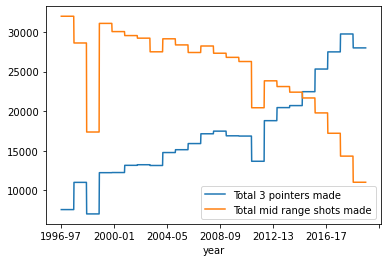

In [211]:
dftotalshots = dftotalshots[dftotalshots.columns[cols]]

dftotalshots.plot.line()

<AxesSubplot:xlabel='year'>

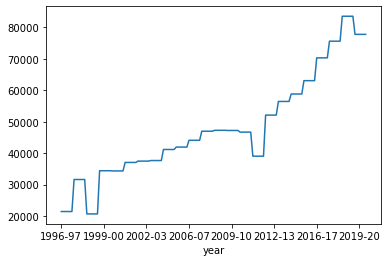

In [212]:
dfcomb["Total 3 pointers attempted"].plot.line()

<AxesSubplot:xlabel='year'>

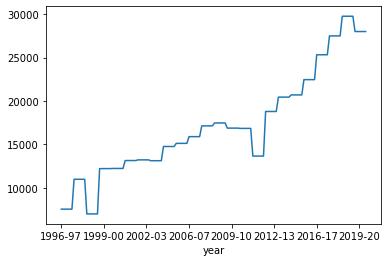

In [213]:
dfcomb["Total 3 pointers made"].plot.line()

#dips due to lockouts 98-99: 50 games, 11-12: 66 games

<AxesSubplot:xlabel='year'>

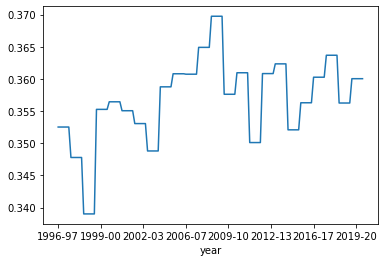

In [214]:
dfcomb["Total 3 pointers percentage"].plot.line()

In [215]:
from nba_api.stats.endpoints import leaguegamelog


gamelog = leaguegamelog.LeagueGameLog()


In [216]:
from nba_api.stats.endpoints import teamyearbyyearstats

teamstats = teamyearbyyearstats.TeamYearByYearStats(league_id)
teamstats.get_data_frames()[0]

,TEAM_ID,TEAM_CITY,TEAM_NAME,YEAR,GP,WINS,LOSSES,WIN_PCT,CONF_RANK,DIV_RANK,...,OREB,DREB,REB,AST,PF,STL,TOV,BLK,PTS,PTS_RANK


In [217]:
from nba_api.stats.endpoints import leaguedashteamstats



champion_name = ["Chicago Bulls", "Chicago Bulls", "San Antonio Spurs",
                 "Los Angeles Lakers", "Los Angeles Lakers", "Los Angeles Lakers",
                 "San Antonio Spurs", "Detroit Pistons", "San Antonio Spurs",
                 "Miami Heat", "San Antonio Spurs", "Boston Celtics", 
                 "Los Angeles Lakers", "Los Angeles Lakers", "Dallas Mavericks",
                 "Miami Heat", "Miami Heat", "San Antonio Spurs", "Golden State Warriors",
                 "Cleveland Cavaliers", "Golden State Warriors", "Golden State Warriors", 
                 "Toronto Raptors", "Los Angeles Lakers","Milwaukee Bucks"]


leaguestats = leaguedashteamstats.LeagueDashTeamStats()
leaguestats.get_data_frames()[0]

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,1610612737,Atlanta Hawks,72,41,31,0.569,3481.0,2937,6281,0.468,...,9,24,17,17,18,9,13,9,10,Atlanta Hawks
1,1610612738,Boston Celtics,72,36,36,0.500,3476.0,2985,6401,0.466,...,16,13,6,11,24,13,16,13,10,Boston Celtics
2,1610612751,Brooklyn Nets,72,48,24,0.667,3481.0,3106,6289,0.494,...,13,27,7,9,13,18,2,7,10,Brooklyn Nets
3,1610612766,Charlotte Hornets,72,33,39,0.458,3471.0,2875,6324,0.455,...,24,10,16,14,5,21,23,23,10,Charlotte Hornets
4,1610612741,Chicago Bulls,72,31,41,0.431,3476.0,3035,6380,0.476,...,27,28,27,18,10,30,21,20,10,Chicago Bulls
5,1610612739,Cleveland Cavaliers,72,22,50,0.306,3486.0,2778,6175,0.450,...,29,12,20,29,7,6,30,28,10,Cleveland Cavaliers
6,1610612742,Dallas Mavericks,72,42,30,0.583,3461.0,2958,6287,0.470,...,3,30,26,2,19,7,17,11,10,Dallas Mavericks
7,1610612743,Denver Nuggets,72,47,25,0.653,3496.0,3114,6422,0.485,...,12,8,21,7,14,15,8,6,10,Denver Nuggets
8,1610612765,Detroit Pistons,72,20,52,0.278,3486.0,2783,6162,0.452,...,25,17,8,28,26,5,27,25,10,Detroit Pistons
9,1610612744,Golden State Warriors,72,39,33,0.542,3461.0,2973,6347,0.468,...,26,6,17,6,28,11,12,14,10,Golden State Warriors


In [218]:
#playoffs

from nba_api.stats.endpoints import leaguedashteamstats





leaguestats = leaguedashteamstats.LeagueDashTeamStats(season_type_all_star='Playoffs')
dfleague = leaguestats.get_data_frames()[0]
dfleague["FG3M"]

0     211
1      64
2     163
3      95
4     147
5     263
6      59
7      52
8      48
9     258
10     52
11    134
12    246
13     97
14    198
15     35
Name: FG3M, dtype: int64

In [219]:
i = 1996

shotseasons = []
while i < 2020:
    year = str(i) + "-" + str(i+1)[2:]
    shot = shotchartleaguewide.ShotChartLeagueWide(league_id, season = year)#goes back to 1996
    shotseasons.append(shot)
    time.sleep(0.5)
    print("loop")
    i+=1

loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop


In [220]:
i = 1996

champ_df = []

while i < 2020:
    year = str(i) + "-" + str(i+1)[2:]
    leaguestats = leaguedashteamstats.LeagueDashTeamStats(season_type_all_star='Playoffs', season=year)
    champ_df.append(leaguestats)
    time.sleep(1)
    print("loop")
    i+=1

loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop


In [221]:
champ_df[1].get_data_frames()[0]["FG3M"]
print(len(champ_df))

filtered_champ_df = []

for frame in champ_df:
    temp = frame.get_data_frames()[0]
    temp = temp.filter(["TEAM_NAME","FG3M", "FG3A"], axis=1)
    filtered_champ_df.append(temp)
    

filtered_champ_df[1]

24


,TEAM_NAME,FG3M,FG3A
0,Atlanta Hawks,27,72
1,Charlotte Hornets,32,100
2,Chicago Bulls,88,272
3,Cleveland Cavaliers,7,24
4,Houston Rockets,24,93
5,Indiana Pacers,87,232
6,Los Angeles Lakers,78,227
7,Miami Heat,36,100
8,Minnesota Timberwolves,37,98
9,New Jersey Nets,7,22


In [222]:
just_champs_df = []
index = 0

for frame in filtered_champ_df:
    filt = frame[frame["TEAM_NAME"] == champion_name[index]]
    index+=1
    just_champs_df.append(filt)
    
total_just_champs = pd.concat(just_champs_df)

total_just_champs #TODO graphs

,TEAM_NAME,FG3M,FG3A
2,Chicago Bulls,116,364
2,Chicago Bulls,88,272
14,San Antonio Spurs,70,200
3,Los Angeles Lakers,124,355
3,Los Angeles Lakers,98,254
5,Los Angeles Lakers,116,342
14,San Antonio Spurs,128,365
3,Detroit Pistons,97,319
13,San Antonio Spurs,164,422
9,Miami Heat,146,439


In [223]:
#new = old.filter(['A','B','D'], axis=1)



dfleague = dfleague.filter(["TEAM_NAME","FG3M", "FG3A"], axis=1)

dfleague

,TEAM_NAME,FG3M,FG3A
0,Atlanta Hawks,211,615
1,Boston Celtics,64,183
2,Brooklyn Nets,163,427
3,Dallas Mavericks,95,245
4,Denver Nuggets,147,385
5,LA Clippers,263,691
6,Los Angeles Lakers,59,197
7,Memphis Grizzlies,52,158
8,Miami Heat,48,143
9,Milwaukee Bucks,258,804


In [224]:
from nba_api.stats.endpoints import teamdashboardbyyearoveryear

leaguetotalstats = teamdashboardbyyearoveryear.TeamDashboardByYearOverYear(team_id)
leaguetotalstats.get_data_frames()[1]

,GROUP_SET,GROUP_VALUE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,By Year,2020-21,72,34,38,0.472,3491.000000,3115,6567,0.474,...,4,11,3,7,4,16,8,18,210,2020-21
1,By Year,2019-20,73,45,28,0.616,3524.000000,3075,6457,0.476,...,3,22,19,3,3,15,11,11,210,2019-20
2,By Year,2018-19,82,48,34,0.585,3941.000000,3390,7135,0.475,...,6,4,16,18,6,11,1,7,210,2018-19
3,By Year,2017-18,82,48,34,0.585,3951.000000,3345,7083,0.472,...,5,3,24,19,5,13,2,13,210,2017-18
4,By Year,2016-17,82,42,40,0.512,3971.000000,3221,6931,0.465,...,7,6,14,13,7,12,3,20,210,2016-17
5,By Year,2015-16,82,45,37,0.549,3976.000000,3142,6985,0.450,...,15,1,18,4,9,10,6,12,210,2015-16
6,By Year,2014-15,82,38,44,0.463,3971.000000,2998,6824,0.439,...,8,24,20,8,12,7,12,16,210,2014-15
7,By Year,2013-14,82,56,26,0.683,3956.000000,2949,6573,0.449,...,19,21,6,6,10,3,15,4,210,2013-14
8,By Year,2012-13,81,49,32,0.605,3918.000000,2845,6525,0.436,...,16,17,1,21,8,5,20,5,210,2012-13
9,By Year,2011-12,66,42,24,0.636,3198.000000,2354,5375,0.438,...,2,23,22,10,2,14,24,8,210,2011-12


In [225]:
from nba_api.stats.endpoints import teamyearbyyearstats

teamyearbyyear = teamyearbyyearstats.TeamYearByYearStats(team_id)
df2 = leaguetotalstats.get_data_frames()[1]
df2.keys()

Index(['GROUP_SET', 'GROUP_VALUE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD',
       'PTS', 'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK',
       'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK',
       'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK',
       'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK',
       'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK',
       'PLUS_MINUS_RANK', 'CFID', 'CFPARAMS'],
      dtype='object')